***Import Library***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from prophet import Prophet
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings("ignore")

***Upload Data***

In [ ]:
df = pd.read_csv('/content/CNSN.csv',parse_dates=True, index_col='Date')
print(df)

            Latitude  Longitude  Depth  Magnitude          Province
Date                                                               
2019-01-01    31.592   -104.549      3        2.7  British Columbia
2019-01-02   -24.200    -67.580    198        4.0             Yukon
2019-01-03    31.647   -104.017      5        2.9           Quebec 
2019-01-04    46.345     13.601      0        0.8          Manitoba
2019-01-05    -4.320    130.810     10        3.3            Quebec
...              ...        ...    ...        ...               ...
2023-12-27    42.906      6.349      5        2.6             Yukon
2023-12-28    37.780     14.455     32        3.6  British Columbia
2023-12-29    35.526     -3.602     25        1.7       Nova Scotia
2023-12-30    37.152     36.957      4        2.5  British Columbia
2023-12-31   -32.200    -71.150     82        2.5       Nova Scotia

[1826 rows x 5 columns]


***Inspect Data***

In [ ]:
df.shape

(1826, 5)

In [ ]:
df.columns

Index(['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Province'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2019-01-01 to 2023-12-31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Latitude   1826 non-null   float64
 1   Longitude  1826 non-null   float64
 2   Depth      1826 non-null   int64  
 3   Magnitude  1826 non-null   float64
 4   Province   1826 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.6+ KB


In [ ]:
print(df.head())

            Latitude  Longitude  Depth  Magnitude          Province
Date                                                               
2019-01-01    31.592   -104.549      3        2.7  British Columbia
2019-01-02   -24.200    -67.580    198        4.0             Yukon
2019-01-03    31.647   -104.017      5        2.9           Quebec 
2019-01-04    46.345     13.601      0        0.8          Manitoba
2019-01-05    -4.320    130.810     10        3.3            Quebec


In [ ]:
print(df.tail())

            Latitude  Longitude  Depth  Magnitude          Province
Date                                                               
2023-12-27    42.906      6.349      5        2.6             Yukon
2023-12-28    37.780     14.455     32        3.6  British Columbia
2023-12-29    35.526     -3.602     25        1.7       Nova Scotia
2023-12-30    37.152     36.957      4        2.5  British Columbia
2023-12-31   -32.200    -71.150     82        2.5       Nova Scotia


In [ ]:
print(df.describe())

          Latitude    Longitude        Depth    Magnitude
count  1826.000000  1826.000000  1826.000000  1826.000000
mean     20.593388    -8.174196    36.617744     2.866265
std      25.162380    90.913250    68.561874     0.936868
min     -48.188000  -178.706000    -3.000000     0.300000
25%       5.520000   -93.110000     6.000000     2.200000
50%      28.585000     3.767500    10.000000     2.900000
75%      38.323250    38.467750    32.000000     3.500000
max      79.458000   179.944000   750.000000     6.700000


In [ ]:
print(df.dtypes)

Latitude     float64
Longitude    float64
Depth          int64
Magnitude    float64
Province      object
dtype: object


***Data Pre-Processing***

*Check for Missing Values*

In [ ]:
df.isnull().sum()

Latitude     0
Longitude    0
Depth        0
Magnitude    0
Province     0
dtype: int64

*Check for Duplicated Values*

In [ ]:
 df.duplicated().sum()

0

*Check for Outliers (Box Plot)*

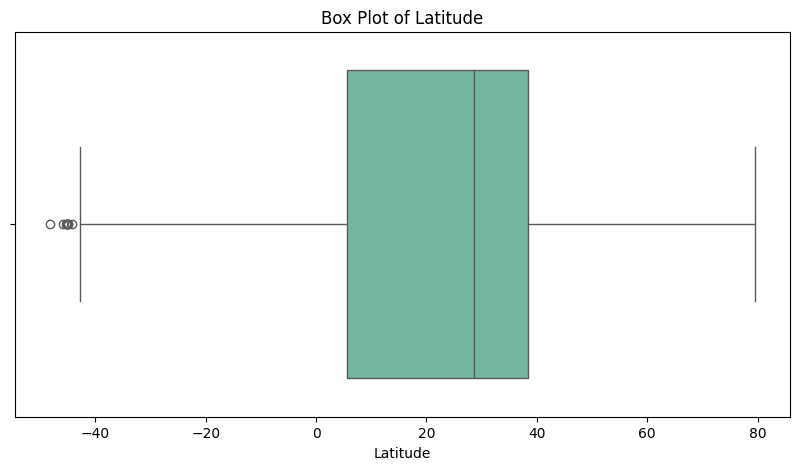

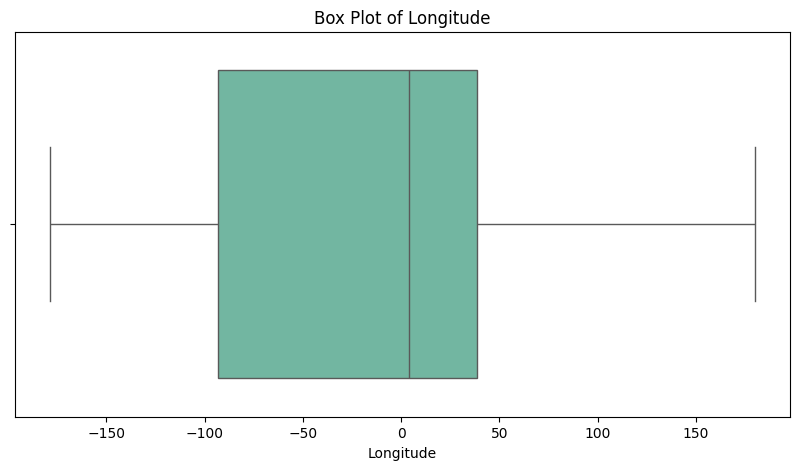

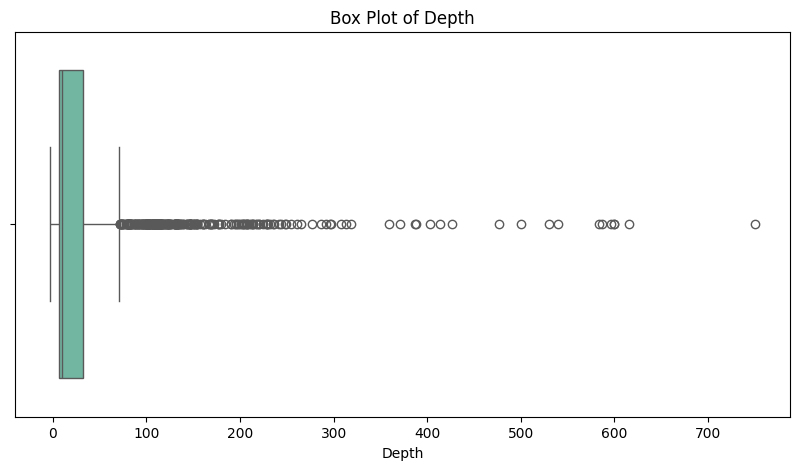

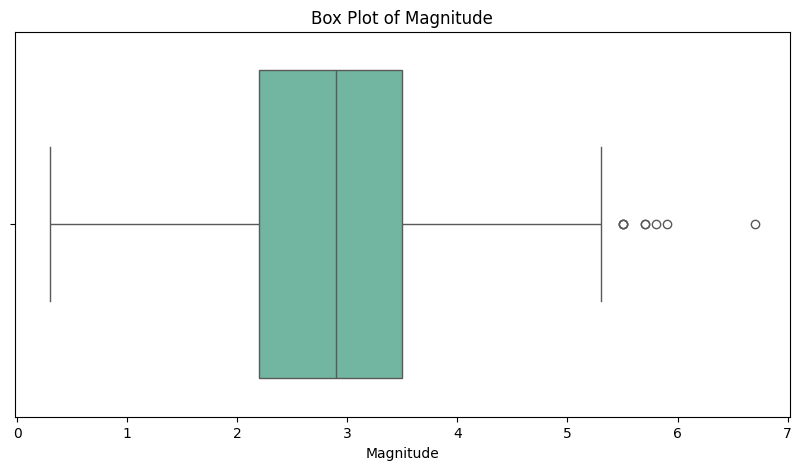

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Latitude'], palette='Set2')
plt.title('Box Plot of Latitude')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Longitude'], palette='Set2')
plt.title('Box Plot of Longitude')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Depth'], palette='Set2')
plt.title('Box Plot of Depth')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Magnitude'], palette='Set2')
plt.title('Box Plot of Magnitude')
plt.show()

*Transform Categorical ---> Numerical*

In [ ]:
df_encoded = pd.get_dummies(df.drop(['Province'], axis=1))
print(df_encoded)

            Latitude  Longitude  Depth  Magnitude
Date                                             
2019-01-01    31.592   -104.549      3        2.7
2019-01-02   -24.200    -67.580    198        4.0
2019-01-03    31.647   -104.017      5        2.9
2019-01-04    46.345     13.601      0        0.8
2019-01-05    -4.320    130.810     10        3.3
...              ...        ...    ...        ...
2023-12-27    42.906      6.349      5        2.6
2023-12-28    37.780     14.455     32        3.6
2023-12-29    35.526     -3.602     25        1.7
2023-12-30    37.152     36.957      4        2.5
2023-12-31   -32.200    -71.150     82        2.5

[1826 rows x 4 columns]


***Data Visualization***

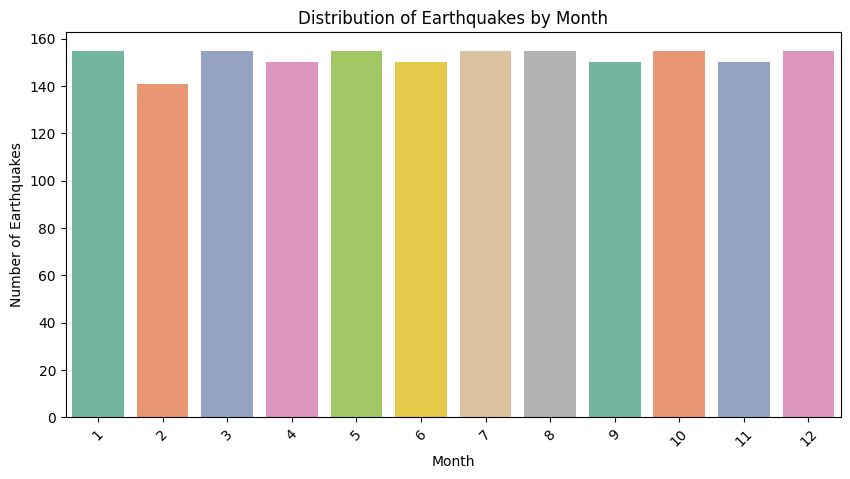

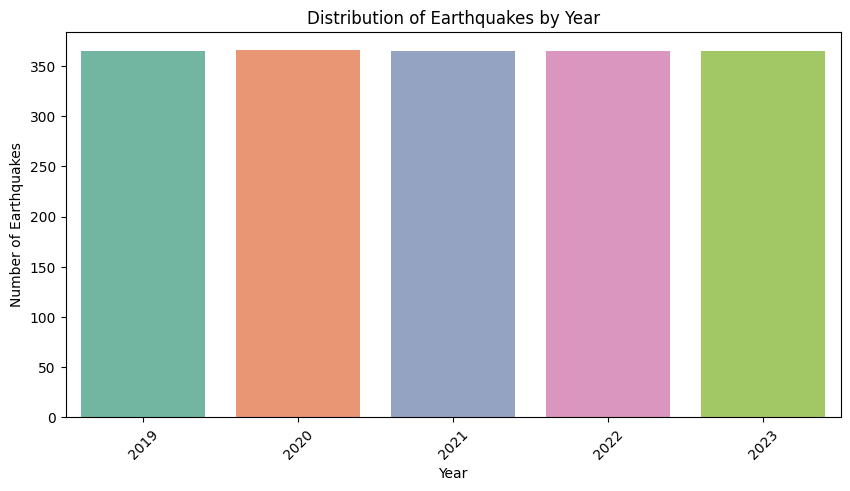

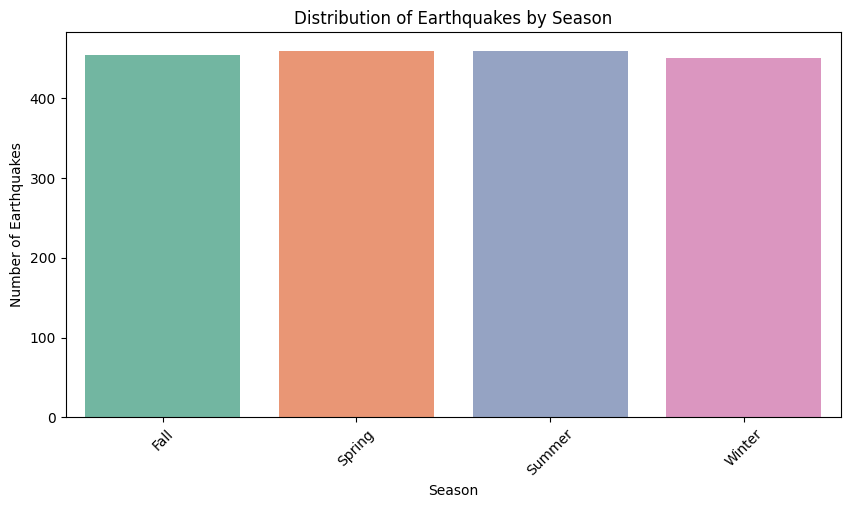

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

earthquakes_by_month = df.groupby(df['Date'].dt.month)['Magnitude'].count()
plt.figure(figsize=(10, 5))
sns.barplot(x=earthquakes_by_month.index, y=earthquakes_by_month.values, palette='Set2')
plt.title('Distribution of Earthquakes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.show()

earthquakes_by_year = df.groupby(df['Date'].dt.year)['Magnitude'].count()
plt.figure(figsize=(10, 5))
sns.barplot(x=earthquakes_by_year.index, y=earthquakes_by_year.values, palette='Set2')
plt.title('Distribution of Earthquakes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.show()


df['Season'] = df['Date'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer',
                                         7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})

earthquakes_by_season = df.groupby('Season')['Magnitude'].count().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='Season', y='Magnitude', data=earthquakes_by_season, palette='Set2')
plt.title('Distribution of Earthquakes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.show()

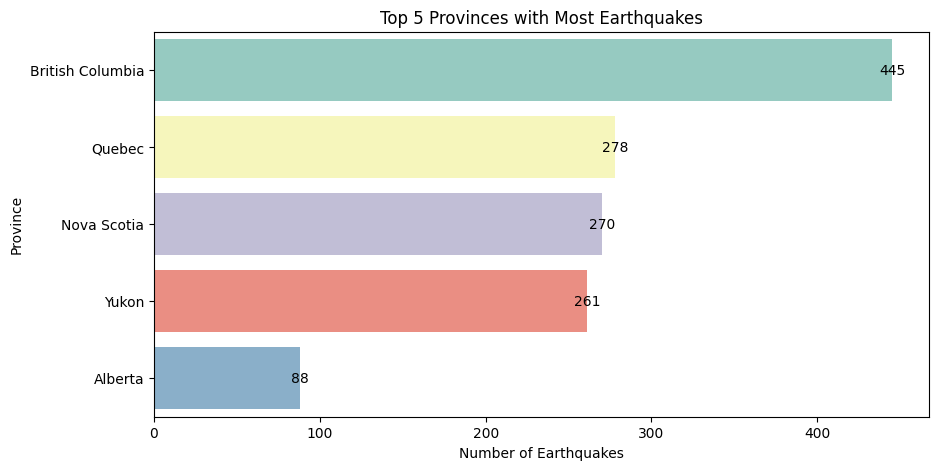

In [ ]:
top_5_provinces = df['Province'].value_counts().head(5)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_provinces.values, y=top_5_provinces.index, palette='Set3')

for i, value in enumerate(top_5_provinces.values):
    plt.text(value, i, str(value), ha='center', va='center', fontsize=10)

plt.title('Top 5 Provinces with Most Earthquakes')
plt.xlabel('Number of Earthquakes')
plt.ylabel('Province')
plt.show()


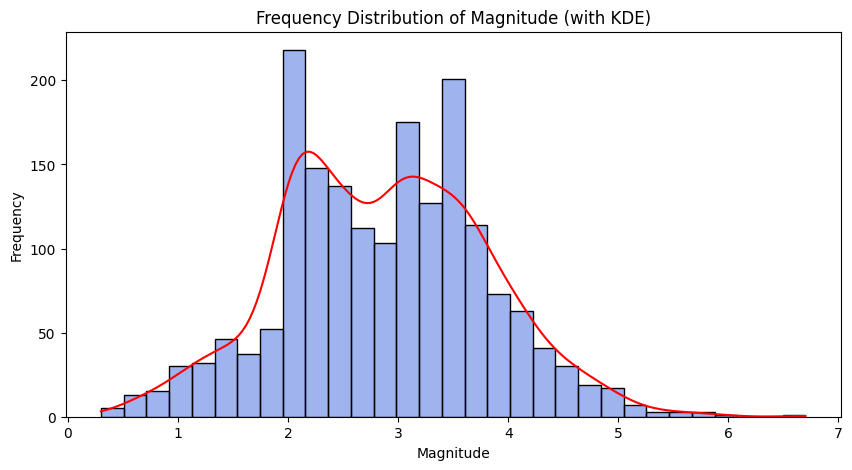

In [ ]:
plt.figure(figsize=(10, 5))
hist = sns.histplot(data=df, x='Magnitude', kde=True, fill=True, color='royalblue')
line = hist.lines[0]
line.set_color('red')
plt.title('Frequency Distribution of Magnitude (with KDE)')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

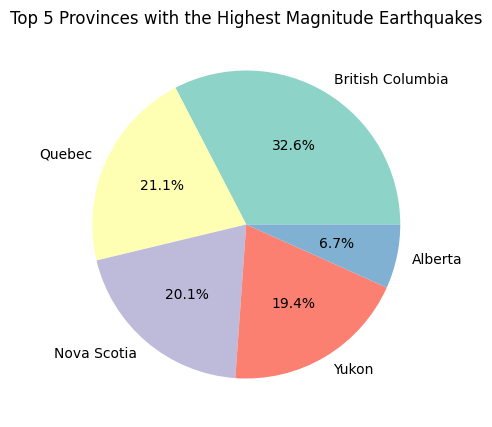

In [ ]:
df_magnitude_province = df.groupby('Province')['Magnitude'].sum().reset_index()

top_5_provinces = df_magnitude_province.nlargest(5, 'Magnitude')

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set3.colors)

plt.figure(figsize=(10, 5))
plt.pie(top_5_provinces['Magnitude'], labels=top_5_provinces['Province'], autopct="%1.1f%%")
plt.title('Top 5 Provinces with the Highest Magnitude Earthquakes')
plt.show()

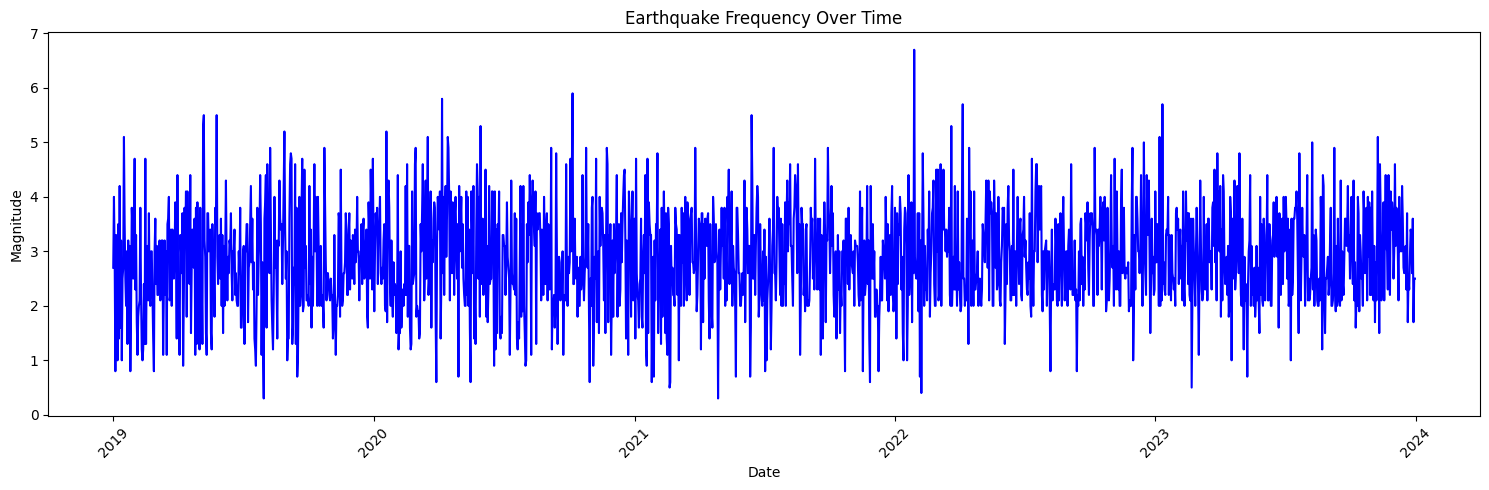

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x=df.index, y='Magnitude', color='b')
plt.title('Earthquake Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Seasonal Decomposition***

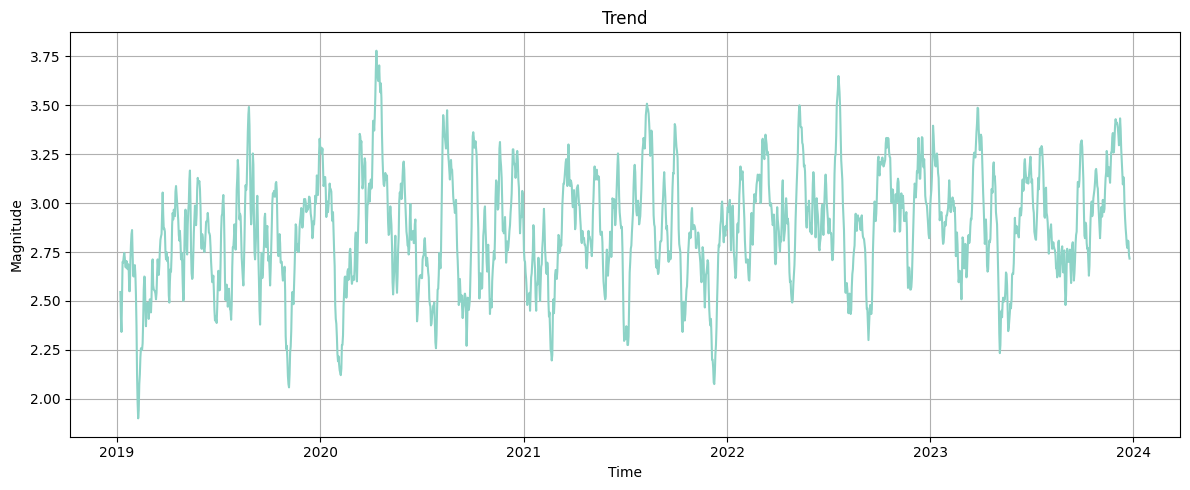

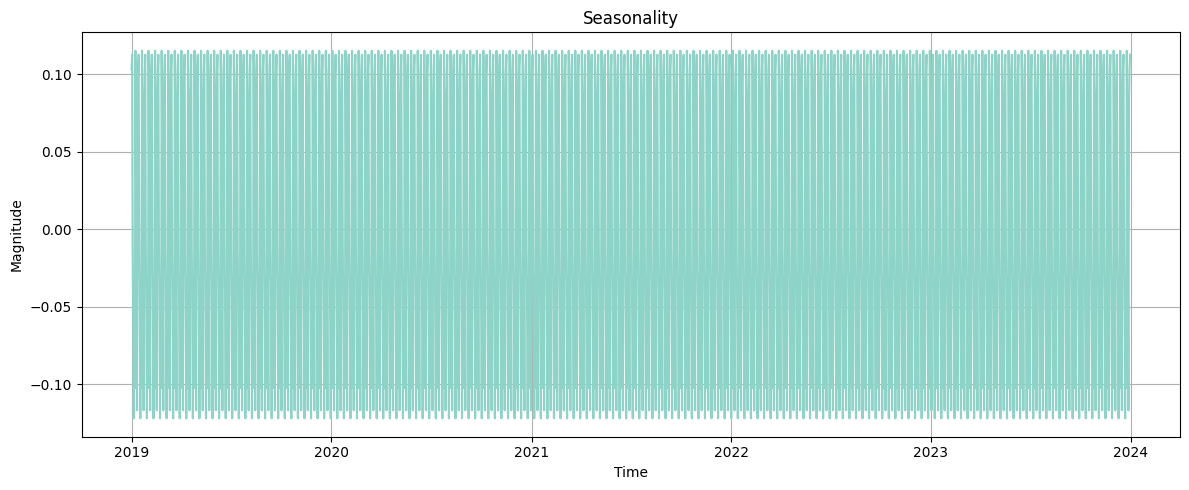

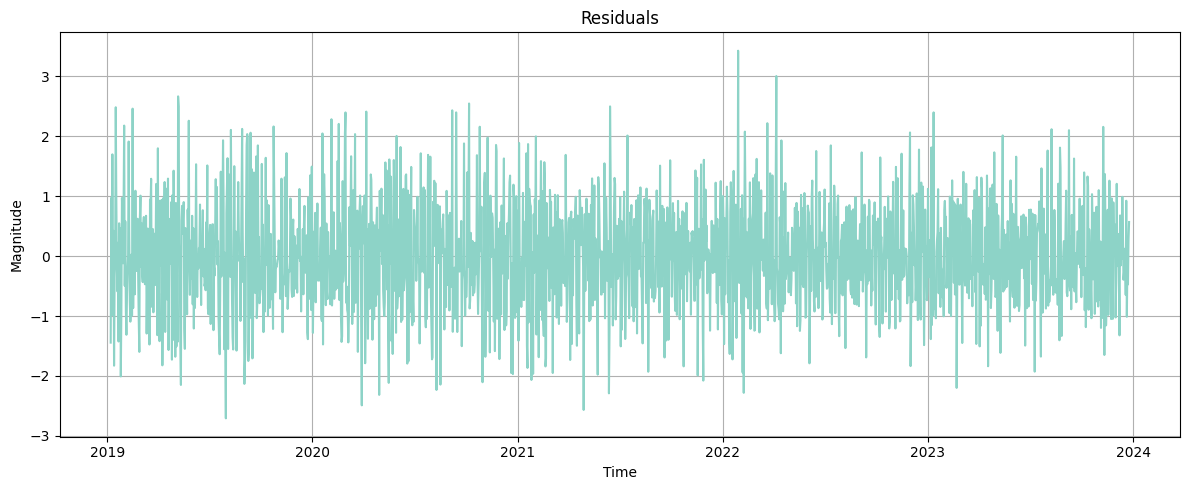

In [ ]:
decomposition = seasonal_decompose(df['Magnitude'], period=12, model='add')


trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 5))
plt.plot(trend)
plt.title('Trend')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))
plt.plot(residual)
plt.title('Residuals')
plt.xlabel('Time')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

***Split Data***

In [ ]:
split_index = int(len(df) * 0.8)

train = df[:split_index]
test = df[split_index:]

print("Training set length:", len(train))
print("Testing set length:", len(test))

Training set length: 1460
Testing set length: 366


***Check Stationarity***

In [ ]:
def check_stationarity(timeseries):
  result = adfuller(timeseries)
  print('ADF Statistic:', result[0])
  print('P-Value:', result[1])
  if result[1] > 0.05:
    print('Time Series is non-stationary.')
  else:
    print('Time Series is stationary.')

check_stationarity(df['Magnitude'])


ADF Statistic: -14.35446517038251
P-Value: 1.0088539050489022e-26
Time Series is stationary.


***Autocorrelation & Partial Autocorrelation***

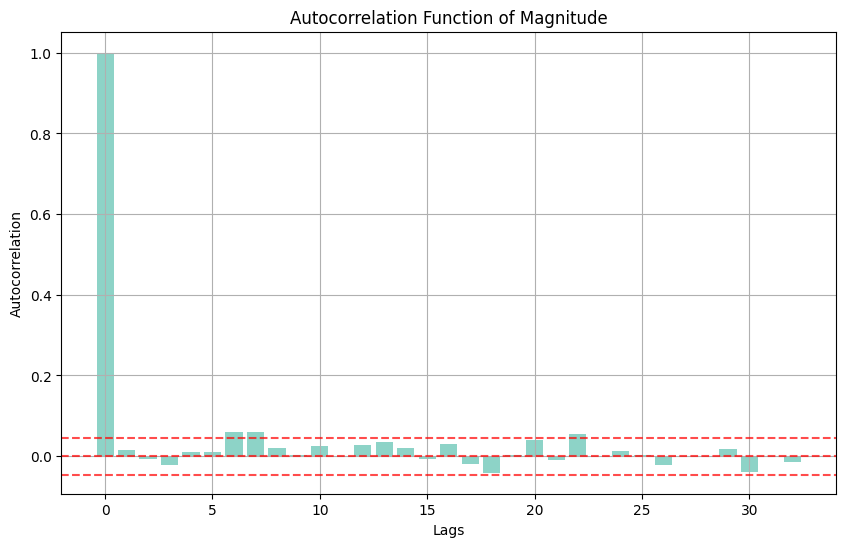

In [ ]:
acf_values = acf(df['Magnitude'])

lags = np.arange(len(acf_values))

plt.figure(figsize=(10, 6))
plt.bar(lags, acf_values)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=1.96/np.sqrt(len(df['Magnitude'])), color='r', linestyle='--', alpha=0.7)
plt.axhline(y=-1.96/np.sqrt(len(df['Magnitude'])), color='r', linestyle='--', alpha=0.7)
plt.title('Autocorrelation Function of Magnitude')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

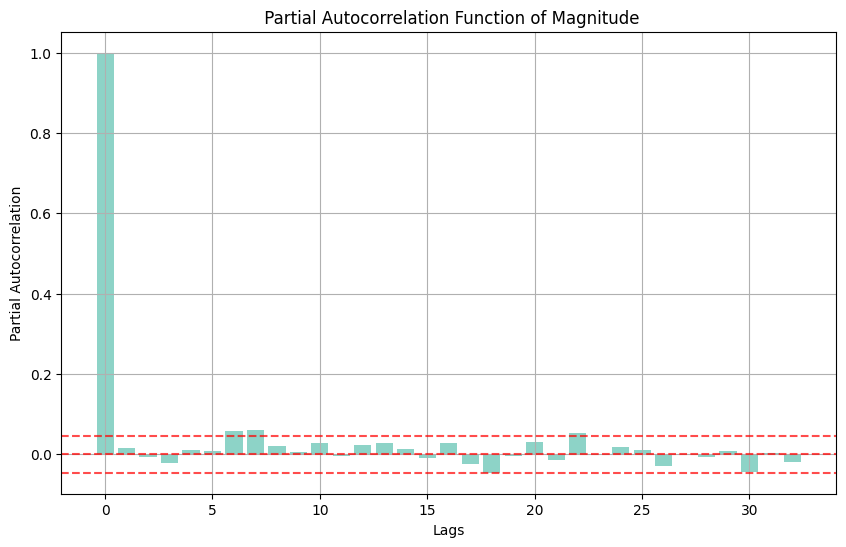

In [ ]:
pacf_values = pacf(df['Magnitude'])

lags = np.arange(len(pacf_values))

plt.figure(figsize=(10, 6))
plt.bar(lags, pacf_values)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.7)
plt.axhline(y=1.96/np.sqrt(len(df['Magnitude'])), color='r', linestyle='--', alpha=0.7)
plt.axhline(y=-1.96/np.sqrt(len(df['Magnitude'])), color='r', linestyle='--', alpha=0.7)
plt.title(' Partial Autocorrelation Function of Magnitude')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

# ***Univariate Models***

***ARIMA***

In [ ]:
p, d, q = 2, 1, 0
arima_model = ARIMA(train['Magnitude'], order=(p, d, q))
arima_fit = arima_model.fit()

In [ ]:
forecast_arima = arima_fit.forecast(steps=len(test))
forecast_arima

2022-12-31    2.542319
2023-01-01    2.547389
2023-01-02    2.437524
2023-01-03    2.504348
2023-01-04    2.496989
                ...   
2023-12-27    2.489775
2023-12-28    2.489775
2023-12-29    2.489775
2023-12-30    2.489775
2023-12-31    2.489775
Freq: D, Name: predicted_mean, Length: 366, dtype: float64

In [ ]:
actual = test['Magnitude']

mse_arima = mean_squared_error(actual, forecast_arima)
rmse_arima = np.sqrt(mse_arima)
mae_arima = mean_absolute_error(actual, forecast_arima)
mape_arima= np.mean(np.abs((actual - forecast_arima) / actual)) * 100


print("Mean Squared Error (MSE):", mse_arima)
print("Root Mean Squared Error (RMSE):", rmse_arima)
print("Mean Absolute Error (MAE):", mae_arima)
print("Mean Absolute Percentage Error (MAPE):", mape_arima)

Mean Squared Error (MSE): 0.9072814921381555
Root Mean Squared Error (RMSE): 0.9525132503740593
Mean Absolute Error (MAE): 0.7512631162171527
Mean Absolute Percentage Error (MAPE): 25.879345706083562


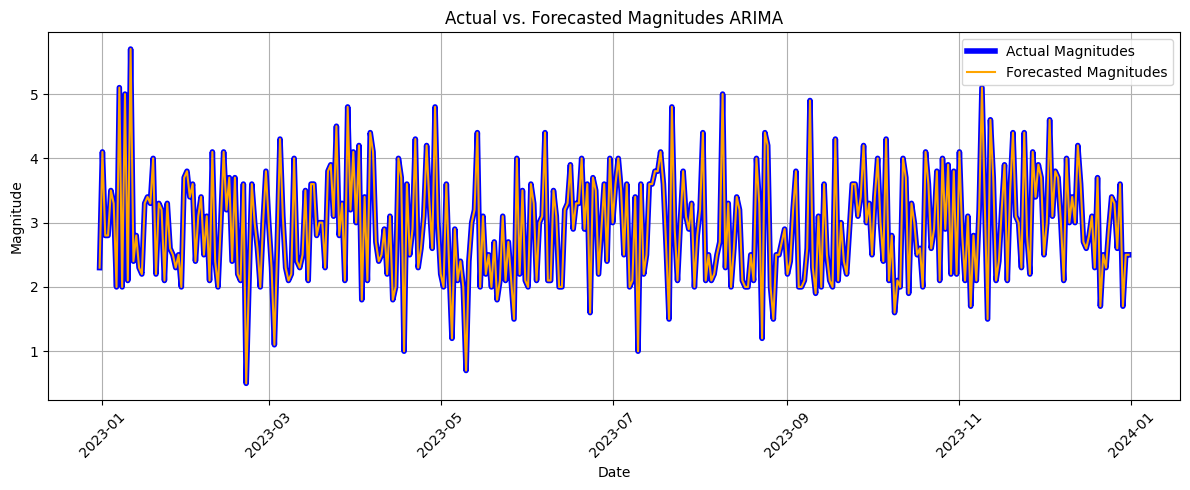

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, actual, label='Actual Magnitudes', color='blue', linewidth=4)
plt.plot(test.index, forecast_arima[:len(test)], label='Forecasted Magnitudes', color='orange')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Actual vs. Forecasted Magnitudes ARIMA')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***SARIMA***

In [ ]:
p, d, q = 2,1,0
P, D, Q, m = 1,0,1,12
sarima_model = SARIMAX(train['Magnitude'], order=(p, d, q), seasonal_order=(P, D, Q, m))
sarima_fit = sarima_model.fit()

In [ ]:
forecast_sarima= sarima_fit.forecast(steps=len(test))
forecast_sarima

2022-12-31    2.478999
2023-01-01    2.605358
2023-01-02    2.454575
2023-01-03    2.517959
2023-01-04    2.567476
                ...   
2023-12-27    2.479405
2023-12-28    2.479405
2023-12-29    2.479405
2023-12-30    2.479405
2023-12-31    2.479405
Freq: D, Name: predicted_mean, Length: 366, dtype: float64

In [ ]:
mse_sarima = mean_squared_error(actual, forecast_sarima)
rmse_sarima = np.sqrt(mse_sarima)
mae_sarima = mean_absolute_error(actual, forecast_sarima)
mape_sarima= np.mean(np.abs((actual - forecast_sarima) / actual)) * 100

print("Mean Squared Error (MSE):", mse_sarima)
print("Root Mean Squared Error (RMSE):", rmse_sarima)
print("Mean Absolute Error (MAE):", mae_sarima)
print("Mean Absolute Percentage Error (MAPE):", mape_sarima)

Mean Squared Error (MSE): 0.9162415013974464
Root Mean Squared Error (RMSE): 0.9572050466840668
Mean Absolute Error (MAE): 0.7541074526167681
Mean Absolute Percentage Error (MAPE): 25.88849977322128


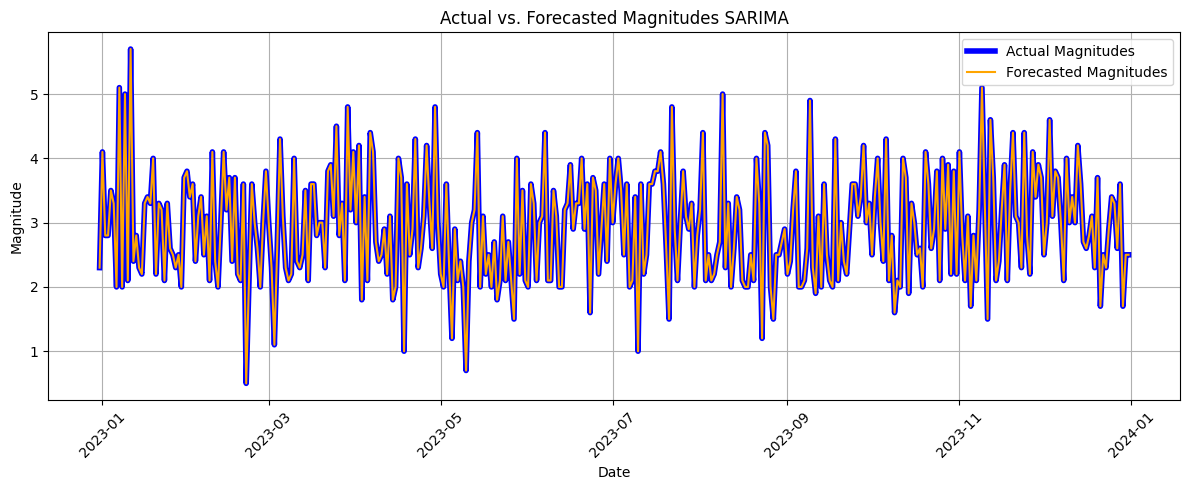

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, actual, label='Actual Magnitudes', color='blue',linewidth=4)
plt.plot(test.index, forecast_sarima[:len(test)], label='Forecasted Magnitudes', color='orange')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Actual vs. Forecasted Magnitudes SARIMA')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Simple Moving Average***

In [ ]:
ma_model = train['Magnitude'].rolling(window=10).mean()
ma_model

Date
2019-01-01     NaN
2019-01-02     NaN
2019-01-03     NaN
2019-01-04     NaN
2019-01-05     NaN
              ... 
2022-12-26    3.04
2022-12-27    3.08
2022-12-28    3.08
2022-12-29    3.15
2022-12-30    2.93
Name: Magnitude, Length: 1460, dtype: float64

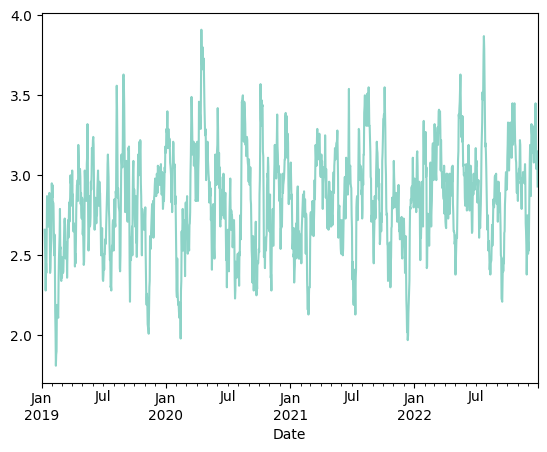

In [ ]:
ma_model.plot()
plt.show()

In [ ]:
forecast_ma = ma_model[-len(test):]
forecast_ma

Date
2021-12-30    2.80
2021-12-31    2.80
2022-01-01    2.83
2022-01-02    2.98
2022-01-03    2.82
              ... 
2022-12-26    3.04
2022-12-27    3.08
2022-12-28    3.08
2022-12-29    3.15
2022-12-30    2.93
Name: Magnitude, Length: 366, dtype: float64

In [ ]:
mse_ma = mean_squared_error(actual, forecast_ma)
rmse_ma = np.sqrt(mse_ma)
mae_ma = mean_absolute_error(actual, forecast_ma)

print("Mean Squared Error (MSE):", mse_ma)
print("Root Mean Squared Error (RMSE):", rmse_ma)
print("Mean Absolute Error (MAE):", mae_ma)

Mean Squared Error (MSE): 0.777789344262295
Root Mean Squared Error (RMSE): 0.8819236612441549
Mean Absolute Error (MAE): 0.7210655737704917


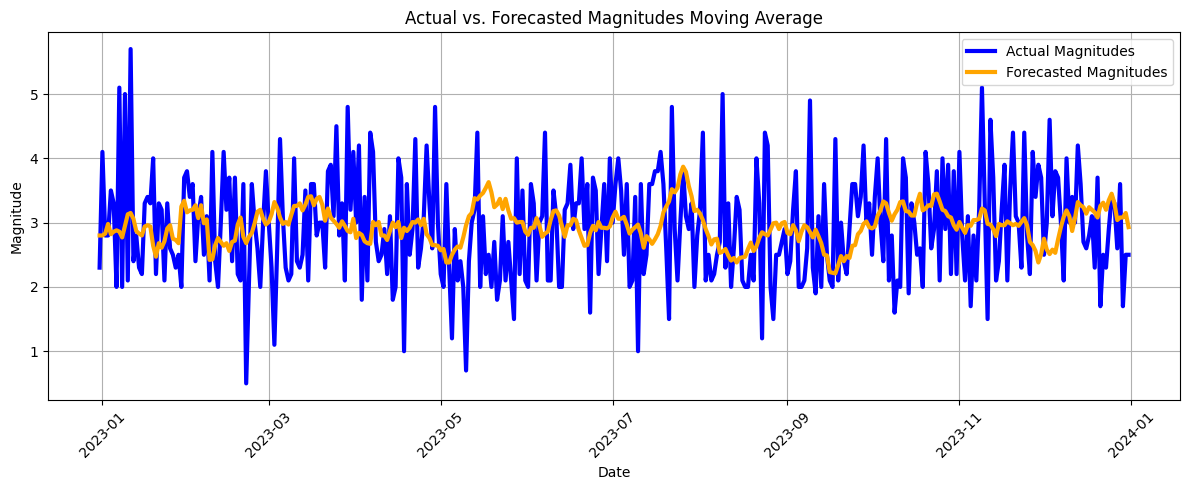

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, actual, label='Actual Magnitudes', color='blue',linewidth=3)
plt.plot(test.index, forecast_ma[:len(test)], label='Forecasted Magnitudes', color='orange',linewidth=3)
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Actual vs. Forecasted Magnitudes Simple Moving Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Simple Exponential Smoothing***

In [ ]:
ses_model = ExponentialSmoothing(train['Magnitude'], trend='add', seasonal='add').fit()

In [ ]:
ses_forecast = ses_model.forecast(len(test))
ses_forecast

2022-12-31    2.939015
2023-01-01    2.856323
2023-01-02    2.999592
2023-01-03    2.982950
2023-01-04    2.987255
                ...   
2023-12-27    3.041257
2023-12-28    3.039343
2023-12-29    3.023553
2023-12-30    2.994075
2023-12-31    2.911383
Freq: D, Length: 366, dtype: float64

In [ ]:
mse_ses = mean_squared_error(actual, ses_forecast)
rmse_ses = np.sqrt(mse_ses)
mae_ses = mean_absolute_error(actual, ses_forecast)
mape_ses= np.mean(np.abs((actual - ses_forecast) / actual)) * 100

print("Mean Squared Error (MSE):", mse_ses)
print("Root Mean Squared Error (RMSE):", rmse_ses)
print("Mean Absolute Error (MAE):", mae_ses)
print("Mean Absolute Percentage Error (MAPE):", mape_ses)

Mean Squared Error (MSE): 0.7111837115133967
Root Mean Squared Error (RMSE): 0.843317088356092
Mean Absolute Error (MAE): 0.6944359523895187
Mean Absolute Percentage Error (MAPE): 28.60661231608107


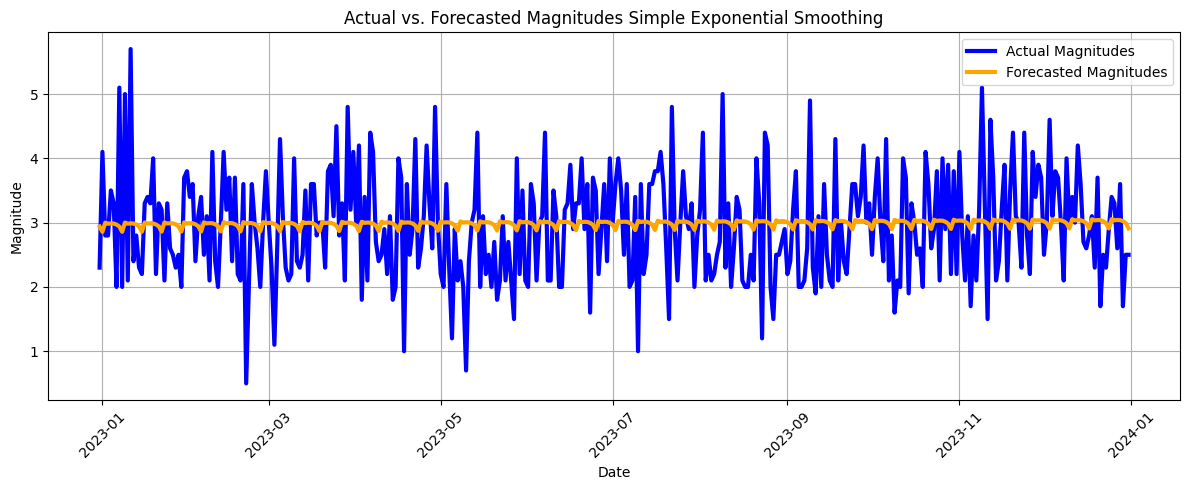

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, actual, label='Actual Magnitudes', color='blue',linewidth=3)
plt.plot(test.index, ses_forecast[:len(test)], label='Forecasted Magnitudes', color='orange',linewidth=3)
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Actual vs. Forecasted Magnitudes Simple Exponential Smoothing')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Exponential Moving Average***


In [ ]:
ema_model = train['Magnitude'].ewm(span=15, adjust=False).mean()
ema_model

Date
2019-01-01    2.700000
2019-01-02    2.862500
2019-01-03    2.867188
2019-01-04    2.608789
2019-01-05    2.695190
                ...   
2022-12-26    3.014194
2022-12-27    3.087420
2022-12-28    3.026492
2022-12-29    3.010681
2022-12-30    2.909346
Name: Magnitude, Length: 1460, dtype: float64

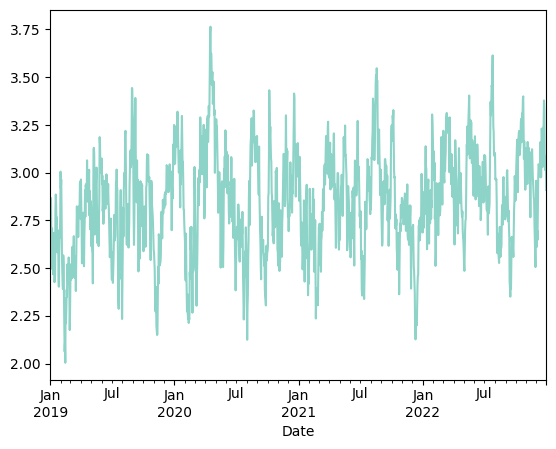

In [ ]:
ema_model.plot()
plt.show()

In [ ]:
forecast_ema = ema_model[-len(test):]
forecast_ema

Date
2021-12-30    2.770098
2021-12-31    2.686335
2022-01-01    2.825543
2022-01-02    2.897351
2022-01-03    2.710182
                ...   
2022-12-26    3.014194
2022-12-27    3.087420
2022-12-28    3.026492
2022-12-29    3.010681
2022-12-30    2.909346
Name: Magnitude, Length: 366, dtype: float64

In [ ]:
mse_ema = mean_squared_error(actual, forecast_ema)
rmse_ema = np.sqrt(mse_ema)
mae_ema = mean_absolute_error(actual , forecast_ema)

print("Moving Average Model:")
print("Mean Squared Error (MSE):", mse_ema)
print("Root Mean Squared Error (RMSE):", rmse_ema)
print("Mean Absolute Error (MAE):", mae_ema)

Moving Average Model:
Mean Squared Error (MSE): 0.7596857180738344
Root Mean Squared Error (RMSE): 0.8715995170224881
Mean Absolute Error (MAE): 0.7138642539244442


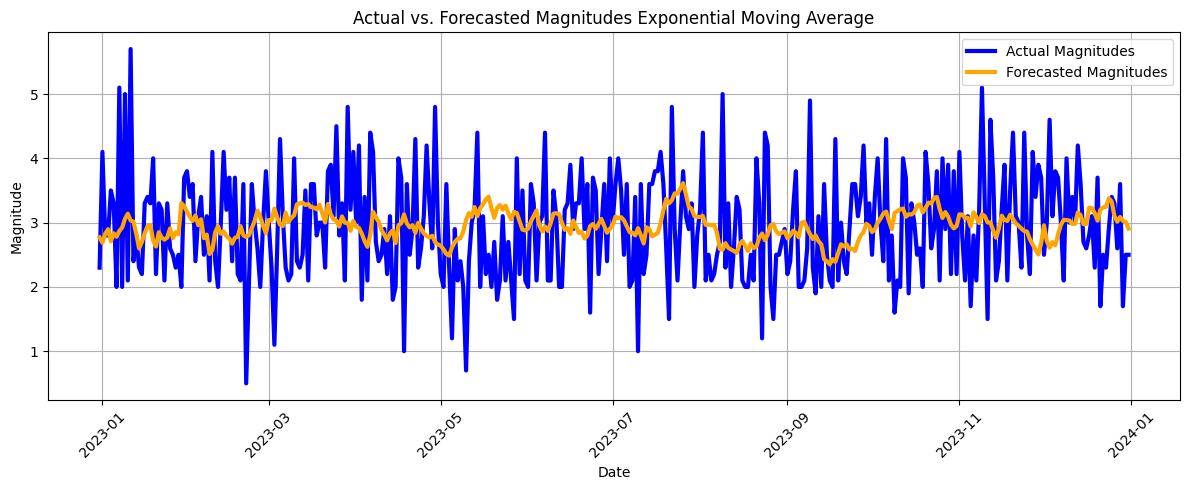

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, actual, label='Actual Magnitudes', color='blue',linewidth=3)
plt.plot(test.index, forecast_ema[:len(test)], label='Forecasted Magnitudes', color='orange',linewidth=3)
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Actual vs. Forecasted Magnitudes Exponential Moving Average')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Holt Winters***

In [ ]:
hw_model = ExponentialSmoothing(train['Magnitude'], seasonal_periods=12, trend='add', seasonal='add').fit()
hw_model

In [ ]:
forecast_hw = hw_model.forecast(len(test))
forecast_hw

2022-12-31    2.972800
2023-01-01    2.934079
2023-01-02    2.881973
2023-01-03    3.076934
2023-01-04    3.046236
                ...   
2023-12-27    2.988591
2023-12-28    2.936485
2023-12-29    3.131446
2023-12-30    3.100748
2023-12-31    3.139227
Freq: D, Length: 366, dtype: float64

In [ ]:
mse_hw = mean_squared_error(actual, forecast_hw)
rmse_hw = np.sqrt(mse_hw)
mae_hw = mean_absolute_error(actual, forecast_hw)
mape_hw = np.mean(np.abs((actual - forecast_hw) / actual)) * 100

print("Moving Average Model:")
print("Mean Squared Error (MSE):", mse_hw)
print("Root Mean Squared Error (RMSE):", rmse_hw)
print("Mean Absolute Error (MAE):", mae_hw)
print("Mean Absolute Percentage Error (MAPE):", mape_hw)

Moving Average Model:
Mean Squared Error (MSE): 0.709553672022418
Root Mean Squared Error (RMSE): 0.8423500887531371
Mean Absolute Error (MAE): 0.69533145775021
Mean Absolute Percentage Error (MAPE): 28.642785565578293


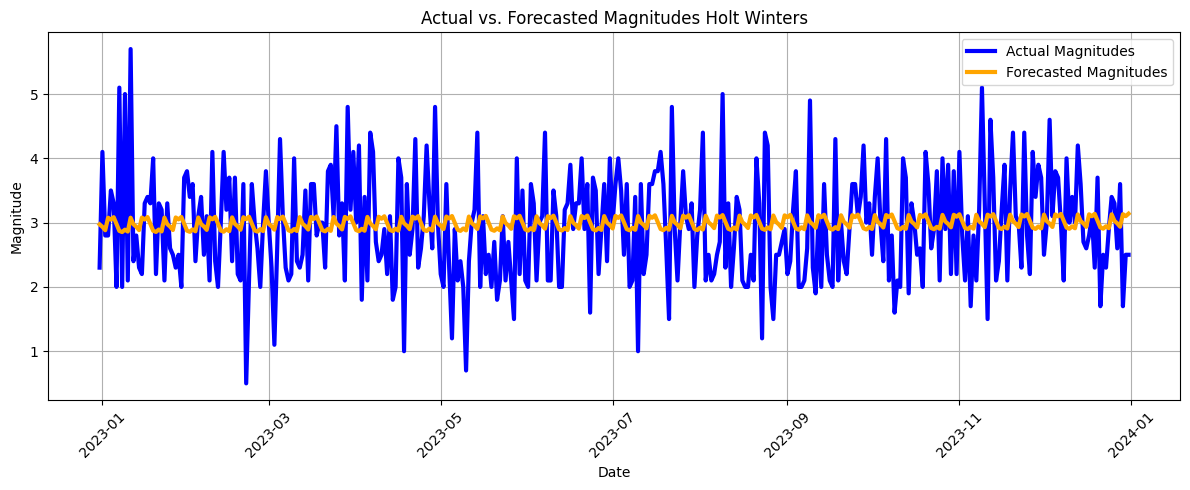

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, actual, label='Actual Magnitudes', color='blue',linewidth=3)
plt.plot(test.index, forecast_hw[:len(test)], label='Forecasted Magnitudes', color='orange',linewidth=3)
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.title('Actual vs. Forecasted Magnitudes Holt Winters')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Prophet***

In [ ]:
df_magnitude = train[['Date', 'Magnitude']]
df_magnitude = df_magnitude.rename(columns={'Date': 'ds', 'Magnitude': 'y'})

In [ ]:
model_magnitude = Prophet()
model_magnitude.fit(df_magnitude)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkg169kue/7nklo4nz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkg169kue/6al38jzz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50432', 'data', 'file=/tmp/tmpkg169kue/7nklo4nz.json', 'init=/tmp/tmpkg169kue/6al38jzz.json', 'output', 'file=/tmp/tmpkg169kue/prophet_modelhu_7q3fc/prophet_model-20240422134832.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:48:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = model_magnitude.make_future_dataframe(periods=len(test))

forecast_magnitude = model_magnitude.predict(future_dates)
print(forecast_magnitude)

             ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2019-01-01  2.746725    1.551415    3.915280     2.746725     2.746725   
1    2019-01-02  2.746866    1.487056    4.092600     2.746866     2.746866   
2    2019-01-03  2.747006    1.614604    3.912568     2.747006     2.747006   
3    2019-01-04  2.747146    1.563007    3.915802     2.747146     2.747146   
4    2019-01-05  2.747287    1.508466    3.902167     2.747287     2.747287   
...         ...       ...         ...         ...          ...          ...   
1821 2023-12-27  3.001346    2.026596    4.403261     3.001322     3.001369   
1822 2023-12-28  3.001485    2.000251    4.393396     3.001462     3.001509   
1823 2023-12-29  3.001625    1.873453    4.281277     3.001601     3.001649   
1824 2023-12-30  3.001765    1.887368    4.280991     3.001741     3.001788   
1825 2023-12-31  3.001904    1.746464    4.140277     3.001880     3.001928   

      additive_terms  additive_terms_lower  additiv

In [ ]:
mse_pro = np.mean((test['Magnitude'] - forecast_magnitude['yhat']) ** 2)
rmse_pro = np.sqrt(np.mean((test['Magnitude'] - forecast_magnitude['yhat']) ** 2))
mae_pro = np.mean(np.abs(test['Magnitude'] - forecast_magnitude['yhat']))
mape_pro = np.mean(np.abs((test['Magnitude'] - forecast_magnitude['yhat']) / test['Magnitude'])) * 100

print("Mean Squared Error (MSE):", mse_pro)
print("Root Mean Squared Error (RMSE):", rmse_pro)
print("Mean Absolute Error (MAE):", mae_pro)
print("Mean Absolute Percentage Error (MAPE):", mape_pro)

Mean Squared Error (MSE): 0.7444516710153928
Root Mean Squared Error (RMSE): 0.8628161281613788
Mean Absolute Error (MAE): 0.7102836359333305
Mean Absolute Percentage Error (MAPE): 29.025410682339242


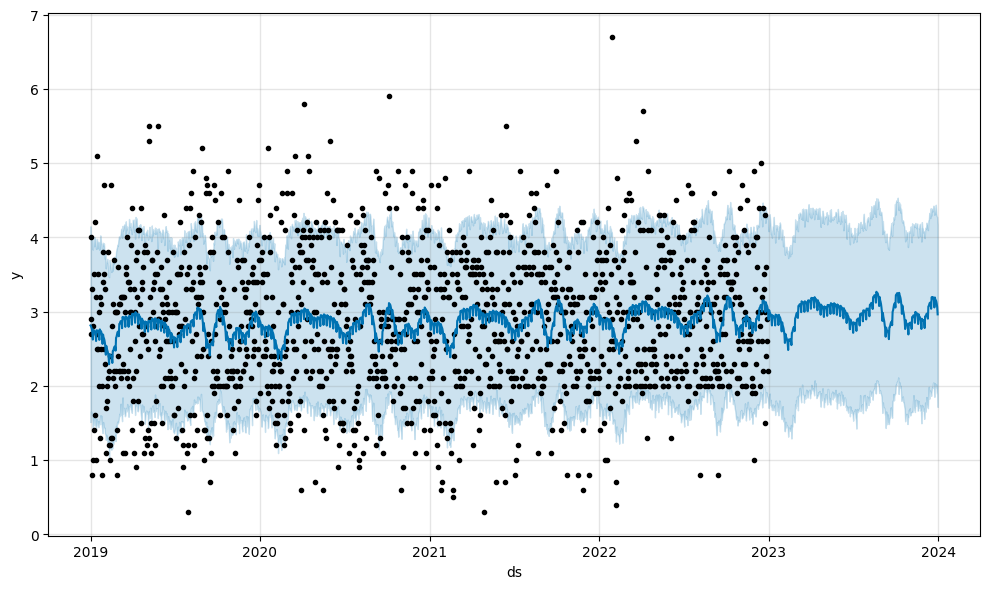

In [ ]:
model_magnitude.plot(forecast_magnitude)
plt.show()

# ***Multivariate Model***

***VAR***

In [ ]:
var_data = train[['Magnitude','Latitude']]

var_model = VAR(var_data)
var_fit = var_model.fit()

In [ ]:
forecast_var = var_fit.forecast(var_fit.endog, steps=(len(test)))
forecast_var

array([[ 2.84242554, 20.81957158],
       [ 2.84858637, 20.94759723],
       [ 2.84918208, 20.93737848],
       [ 2.84919858, 20.93726709],
       [ 2.84919935, 20.93725735],
       [ 2.84919938, 20.93725707],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938, 20.93725706],
       [ 2.84919938,

In [ ]:
actual = test[['Magnitude','Latitude']]

In [ ]:
mse_var = mean_squared_error(actual, forecast_var)
rmse_var = np.sqrt(mse_var)
mae_var = mean_absolute_error(actual, forecast_var)
mape_var = np.mean(np.abs((actual - forecast_var) / actual)) * 100

print("Mean Squared Error (MSE):", mse_var)
print("Root Mean Squared Error (RMSE):", rmse_var)
print("Mean Absolute Error (MAE):", mae_var)
print("Mean Absolute Percentage Error (MAPE):", mape_var)

Mean Squared Error (MSE): 323.0733272763394
Root Mean Squared Error (RMSE): 17.974240659241755
Mean Absolute Error (MAE): 10.691679613193156
Mean Absolute Percentage Error (MAPE): 145.65684513026613


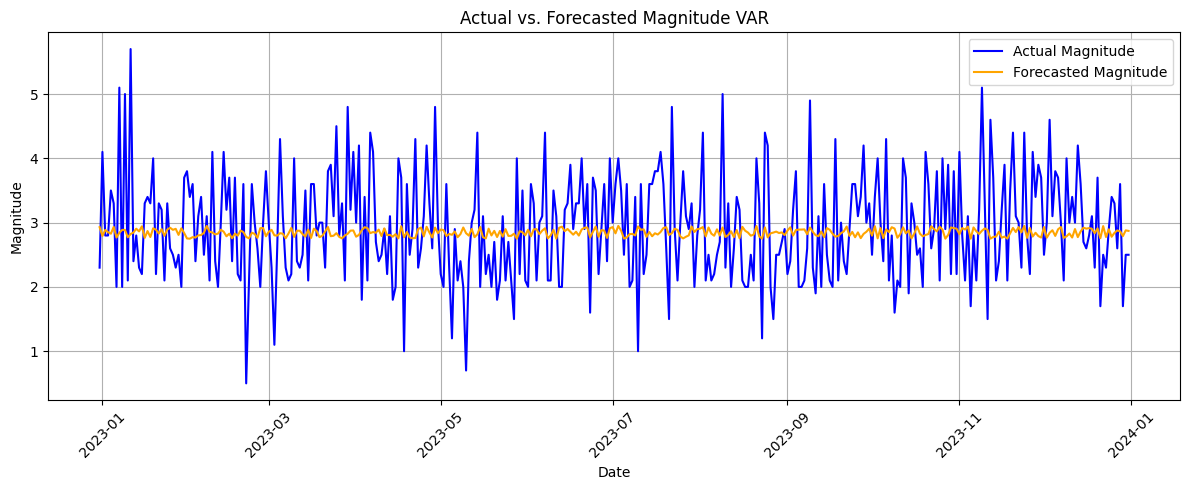

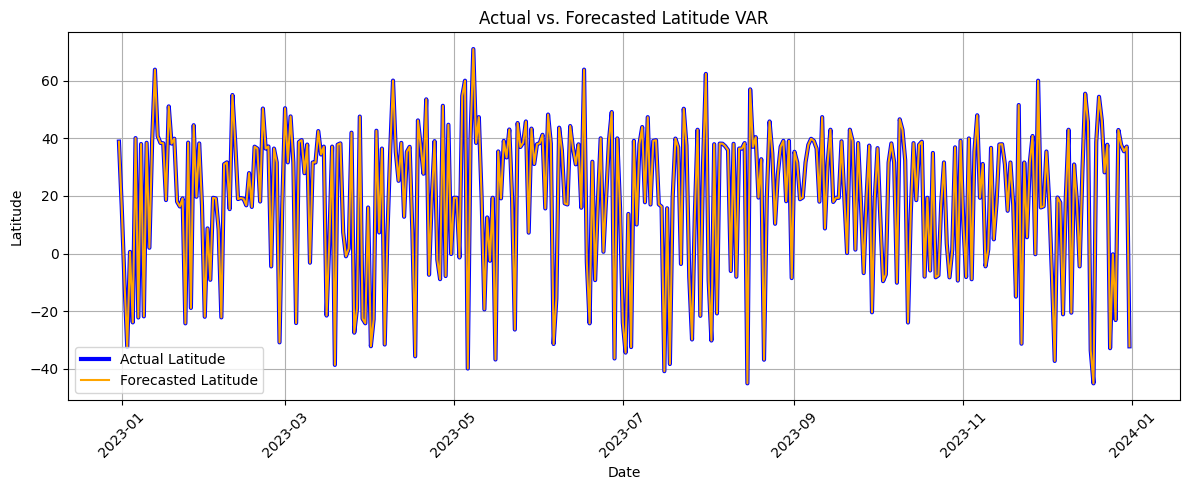

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, test['Magnitude'], label='Actual Magnitude', color='blue', linestyle='-')
plt.plot(test.index, forecast_var[:, 0], label='Forecast Magnitude', color='orange', linestyle='-')
plt.ylabel('Magnitude')
plt.xlabel('Date')
plt.title('Actual vs. Forecasted Magnitude VAR')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(test.index, test['Latitude'], label='Actual Latitude', color='blue', linestyle='-',linewidth=3)
plt.plot(test.index, forecast_var[:, 1], label='Forecast Latitude', color='orange', linestyle='-')
plt.ylabel('Latitude')
plt.xlabel('Date')
plt.title('Actual vs. Forecasted Latitude VAR')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***Model Comparison***

In [ ]:
models = [
    {'model': 'ARIMA', 'MSE': mse_arima, 'MAE': mae_arima, 'RMSE': rmse_arima},
    {'model': 'SARIMA', 'MSE': mse_sarima, 'MAE': mae_sarima, 'RMSE': rmse_sarima},
    {'model': 'Moving Average', 'MSE': mse_ma, 'MAE': mae_ma, 'RMSE': rmse_ma},
    {'model': 'Simple Exponential Smoothing', 'MSE': mse_ses, 'MAE': mae_ses, 'RMSE': rmse_ses},
    {'model': 'Exponential Moving Average', 'MSE': mse_ema, 'MAE': mae_ema, 'RMSE': rmse_ema},
    {'model': 'Holt Winters', 'MSE': mse_hw, 'MAE': mae_hw, 'RMSE': rmse_hw},
    {'model': 'Prophet', 'MSE': mse_pro, 'MAE': mae_pro, 'RMSE': rmse_pro},
    {'model': 'VAR', 'MSE': mse_var, 'MAE': mae_var, 'RMSE': rmse_var},
]

df_comparison = pd.DataFrame(models)
df_comparison.set_index('model', inplace=True)

# Sort the DataFrame by multiple columns in ascending order (from lowest to highest)
df_sorted = df_comparison.sort_values(['MAE', 'RMSE', 'MSE'], ascending=[True, True, True])

print(df_sorted)

                                      MSE        MAE       RMSE
model                                                          
Simple Exponential Smoothing     0.711184   0.694436   0.843317
Holt Winters                     0.709554   0.695331   0.842350
Prophet                          0.744452   0.710284   0.862816
Exponential Moving Average       0.759686   0.713864   0.871600
Moving Average                   0.777789   0.721066   0.881924
ARIMA                            0.907281   0.751263   0.952513
SARIMA                           0.916242   0.754107   0.957205
VAR                           3833.198215  23.119664  61.912828
